
**1. Load the dataset and split it into training and testing sets (80% training, 20% testing).**




In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Housing.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
furnishingstatus_enco = pd.get_dummies(data.furnishingstatus)

In [ ]:
col = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']

for c in col:
  data[c] = data[c].apply(lambda x:0 if x=='no' else 1)

In [ ]:
data = data.drop(['furnishingstatus'], axis=1)
data = pd.concat([data, furnishingstatus_enco], axis=1)

In [ ]:
feature = data.drop(['price'], axis=1)
label = data['price']

In [ ]:
from sklearn.model_selection import train_test_split

f_train, f_test, l_train, l_test = train_test_split(feature, label, test_size=0.2, random_state=0)

In [ ]:
d = [f_train, f_test, l_train, l_test]
n = ['f_train', 'f_test', 'l_train', 'l_test']

for m, l in zip(d, n):
  print(f'Shape of {l} is {m.shape}')

Shape of f_train is (436, 14)
Shape of f_test is (109, 14)
Shape of l_train is (436,)
Shape of l_test is (109,)


**2. Apply linear regression to the training set and evaluate its performance on the testing set using mean squared error (MSE). Report the MSE score.**



In [ ]:
from sklearn.linear_model import LinearRegression

lr_m = LinearRegression()
lr_m.fit(f_train, l_train)


LinearRegression()

In [ ]:
predict_lr_m = lr_m.predict(f_test)

In [ ]:
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(l_test, predict_lr_m)
rmse_lr = np.sqrt(mse_lr)

print('MSE =>', mse_lr)
print('RMSE =>', rmse_lr)

MSE => 976484771024.6138
RMSE => 988172.4399236267


**3. Implement naive Bayes on the training set and compute its accuracy on the testing set. Report the accuracy score.**


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_m = GaussianNB()
nb_m.fit(f_train, l_train)

GaussianNB()

In [ ]:
predict_nb_m = nb_m.predict(f_test)

In [ ]:
mse_nb = mean_squared_error(l_test, predict_nb_m)
rmse_nb = np.sqrt(mse_nb)

print('MSE =>', mse_nb)
print('RMSE =>', rmse_nb)

MSE => 2952016575688.073
RMSE => 1718143.351320859


**4. Build a random forest regressor on the training set and evaluate its performance on the testing set using mean squared error (MSE). Report the MSE score.**


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_m = RandomForestRegressor(n_estimators=150, random_state=0, max_depth=5)
rf_m.fit(f_train, l_train)

RandomForestRegressor(max_depth=5, n_estimators=150, random_state=0)

In [ ]:
predict_rf_m = rf_m.predict(f_test)

In [ ]:
mse_rf = mean_squared_error(l_test, predict_rf_m)
rmse_rf = np.sqrt(mse_rf)

print('MSE =>', mse_rf)
print('RMSE =>', rmse_rf)

MSE => 1244770620954.3716
RMSE => 1115692.888278119


**5. Compare the performance of linear regression, naive Bayes, and random forest. Which algorithm achieved the lowest MSE or highest accuracy in this case?**



In [ ]:
print('MSE Linear Regression =>', mse_lr)
print('MSE Naive Bayes Regression =>', mse_nb)
print('MSE Random Forest Regression =>', mse_rf)

MSE Linear Regression => 976484771024.6138
MSE Naive Bayes Regression => 2952016575688.073
MSE Random Forest Regression => 1244770620954.3716


In [ ]:
score_mse = {'Linear Regression':mse_lr, 'Naive Bayes':mse_nb, 'Random Forest':mse_nb}

print('Model having least Mean Squared Error :', min(score_mse))

Model having least Mean Squared Error : Linear Regression


**6. Choose one of the algorithms that performed well and briefly discuss why it might be suitable for this specific problem.**


Based on the comparison of **MSE** value we can say that in this particular problem scenario Linear Regerssion model is performing well and also it might be suitable model by considering the followig points.

=> Less overall **MSE** value among other performed model

=> This model can be further optimized.

=> Regeularization can be done to further reduce the **MSE** value, leaving us with more robust model.

=> Linear Regression model is the widely used model for continous value prediction.

=> This model falls under the category of eager learner.



**7. What are some potential ways to improve the performance of the chosen algorithm?**


SOme of the potential ways to imporve the model :

=> Regularization

=> Outlier and noise handling.

=> Data Scaling / Normalization

In [ ]:
from sklearn.linear_model import Lasso, Ridge

regu_lr = Lasso(alpha=2.0)

regu_lr.fit(f_train, l_train)

Lasso(alpha=2.0)

In [ ]:
regu_ri = Ridge(alpha=2.0)
regu_ri.fit(f_train, l_train)

Ridge(alpha=2.0)

In [ ]:
predict_regu_lr = regu_lr.predict(f_test)
predict_regu_ri = regu_ri.predict(f_test)

In [ ]:
print(f'MSE_LINER_REGRESSION : {mse_lr}')
print(f'MSE_LASSO : {mean_squared_error(l_test, predict_regu_lr)}')
print(f'MSE_RIDGE : {mean_squared_error(l_test, predict_regu_ri)}')

MSE_LINER_REGRESSION : 976484771024.6138
MSE_LASSO : 976473223872.7405
MSE_RIDGE : 952777375097.6664


In [ ]:
mse_lr < mean_squared_error(l_test, predict_regu_lr)     #Lasso

False

In [ ]:
mse_lr <  mean_squared_error(l_test, predict_regu_ri)   #Ridge

False

**8. Plot a scatter plot comparing the predicted house prices from the chosen algorithm with the actual house prices in the testing set.**


Text(0.5, 1.0, 'Actual VS Predicted')

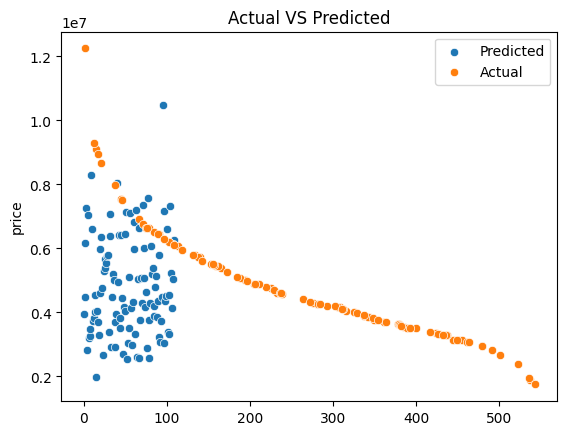

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(predict_lr_m, label='Predicted')
sns.scatterplot(l_test, label='Actual')

plt.title('Actual VS Predicted')

**9. Explain one practical application for each of the three algorithms: linear regression, naive Bayes, and random forest.**


**Linear Regression:**

Stock Price Prediction -> Stocsk prices are generally continous in nature and are having some patterns, even some of the feature if relevant can be related henece easy to idenetify the relationship between the features, enabling the modeling of trends over time.

**Naive Bayes:**

Text Classification -> As there might be various text which may appear to be same but having diiferent symbolism and meaning thus classifing them on the base of probaility will be a good idea.

**Random Forest:**

Credit Scoring -> Random forest is basically the combination of multiple decision trees, which is highly based on conditional selection on making decisions after identifying the best feature based on certain parmeters, thus in practical scenario credit scoring depends on multiple features, hence dealing this problem based on certain conditional algorithm will bea good idea as each tree identifies the best features based on certain parameters, and the combination of these trees enhances the accuracy of credit scoring by handling complex relationships among features

**10. In what scenarios would you prefer to use linear regression over naive Bayes and random forest, and vice versa?**


**Linear Regression**

=> When most of the assumption of the model are standing true for the dataset.

=> When the target is continous and there is aome trend.

**Naive Bayes**

=> When most of the assumption of the model are standing true for the dataset.

=> When the target varibable is ambiguous, and instead of predciting directly, we are tend to predict the value based on probaility.

**Random Forest**

=> When most of the assumption of the model are standing true for the dataset.

=> When target varibale is derived by multiple feature either dependently or independently and falls under some criteria of decion of the feature.